In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',200)

In [2]:
df = pd.read_csv('../US_births.csv', low_memory=False)

In [3]:
df = df.sample(n=100_000, random_state=42)

In [4]:
df.shape

(100000, 55)

In [5]:
df.drop(df[df['DBWT'].eq(9999)].index, inplace=True)

In [6]:
df.drop(df[df['BMI'].eq(99.9)].index, inplace=True)
df.drop(df[df['DBWT'].eq(9999)].index, inplace=True)
df.drop(df[df['WTGAIN'].eq(99)].index, inplace=True)
df.drop(df[df['PWgt_R'].eq(999)].index, inplace=True)
df['binary_sex'] = np.where(df['SEX'] == 'M', 1, 0)
df.drop(df[df['FAGECOMB'].eq(99)].index, inplace=True)
df['first_birth'] = np.where(df['ILLB_R'].eq(888), 1, 0)

In [7]:
df.shape

(85804, 57)

In [8]:
conditions = [df['CIG_0'].eq(0),
              df['CIG_0'].eq(99),
              
    
]
choices = ['None',
           'Unknown',
]

df['smoked'] = np.select(conditions, choices, 'Daily')

In [9]:
conditions = [df['PRIORDEAD'].eq(0),
              df['PRIORDEAD'].eq(99),
              
    
]
choices = ['None',
           'Unknown',
]

df['PRIORDEAD_cat'] = np.select(conditions, choices, 'Yes')

In [10]:
conditions = [df['PRIORTERM'].eq(0),
              df['PRIORTERM'].eq(99),
              
    
]
choices = ['None',
           'Unknown',
]

df['PRIORTERM_cat'] = np.select(conditions, choices, 'Yes')

In [11]:
conditions = [df['PRIORLIVE'].eq(0),
              df['PRIORLIVE'].eq(99),
              
    
]
choices = ['None',
           'Unknown',
]

df['PRIORLIVE_cat'] = np.select(conditions, choices, 'Yes')

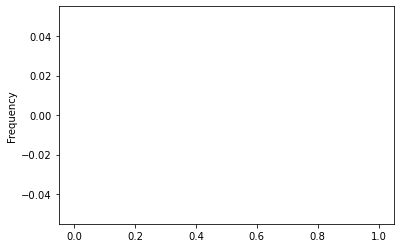

In [12]:
df[df['WTGAIN'].eq(99)]['BMI'].plot(kind='hist')

In [13]:
df.shape

(85804, 61)

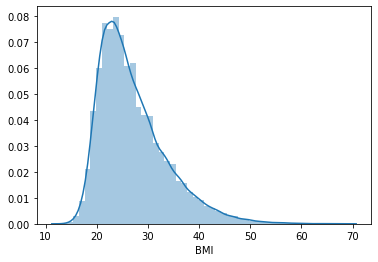

In [14]:
sns.distplot(df['BMI'])

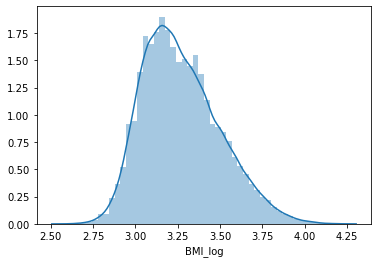

In [15]:
df['BMI_log'] = np.log(df['BMI'])
sns.distplot(df['BMI_log'])

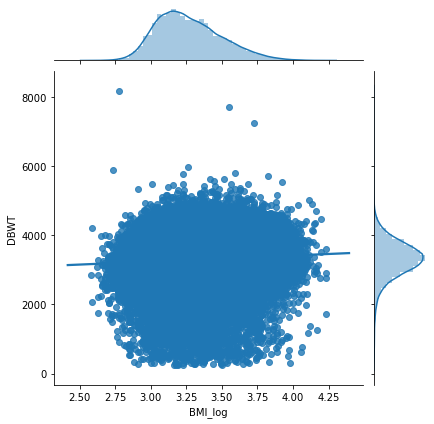

In [16]:
sns.jointplot(x='BMI_log', y= 'DBWT', data =df, kind='reg')

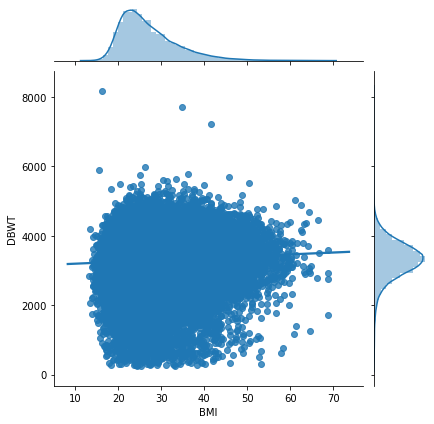

In [17]:
sns.jointplot(x='BMI', y= 'DBWT', data =df, kind='reg')

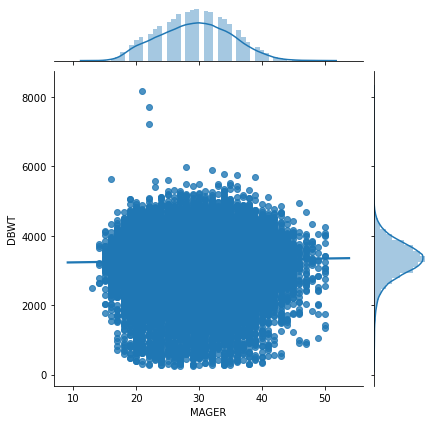

In [18]:
sns.jointplot(x='MAGER', y= 'DBWT', data =df, kind='reg')

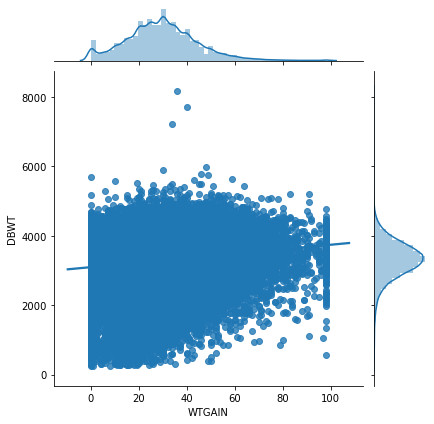

In [19]:
sns.jointplot(x='WTGAIN', y= 'DBWT', data =df, kind='reg')

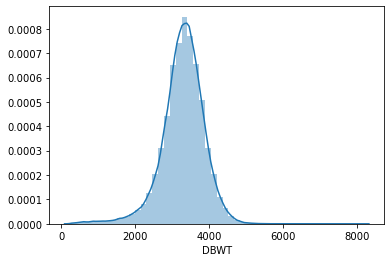

In [20]:
sns.distplot(df['DBWT'])

In [21]:
df['SEX'].unique()

array(['F', 'M'], dtype=object)

In [22]:
_M_df = df[df['SEX'].eq('M')]
_F_df = df[df['SEX'].eq('F')]

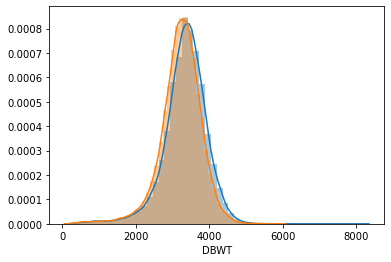

In [23]:
sns.distplot(_M_df['DBWT'])
sns.distplot(_F_df['DBWT'])

In [24]:
from statsmodels.formula.api import ols
formula = 'DBWT~binary_sex'
model = ols(formula=formula, data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   DBWT   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     908.0
Date:                Wed, 29 Jul 2020   Prob (F-statistic):          1.97e-198
Time:                        14:34:21   Log-Likelihood:            -6.6698e+05
No. Observations:               85804   AIC:                         1.334e+06
Df Residuals:                   85802   BIC:                         1.334e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3224.9878      2.813   1146.528      0.000    3219.475    3230.501
binary_sex   118.3388      3.927     30.133      0.000     110.641     126.036
==============================================================================
Omnibus:                    13652.131   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39533.358
Skew:                          -0.849   Prob(JB):                         0.00
Kurtosis:                       5.859   Cond. No.                         2.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
from scipy import stats
stats.f_oneway(_M_df['DBWT'], _F_df['DBWT'])

F_onewayResult(statistic=907.9886499804788, pvalue=1.9652764524556107e-198)

In [26]:
del _M_df
del _F_df

In [27]:
df['MRAVE6'].unique()

array([1, 2, 4, 3, 6, 5], dtype=int64)

In [28]:
_1_race = df[df['MRAVE6'].eq(1)]
_2_race = df[df['MRAVE6'].eq(2)]
_3_race = df[df['MRAVE6'].eq(3)]
_4_race = df[df['MRAVE6'].eq(4)]
_5_race = df[df['MRAVE6'].eq(5)]
_6_race = df[df['MRAVE6'].eq(6)]

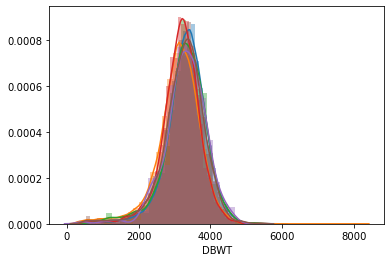

In [29]:
sns.distplot(_1_race['DBWT'])
sns.distplot(_2_race['DBWT'])
sns.distplot(_3_race['DBWT'])
sns.distplot(_4_race['DBWT'])
sns.distplot(_5_race['DBWT'])
sns.distplot(_6_race['DBWT'])

In [30]:
stats.f_oneway(_1_race['DBWT'], _2_race['DBWT'], _3_race['DBWT'], _4_race['DBWT'], _5_race['DBWT'], _6_race['DBWT'])

F_onewayResult(statistic=345.65160602265075, pvalue=0.0)

In [31]:
del _1_race
del _2_race
del _3_race
del _4_race
del _5_race
del _6_race

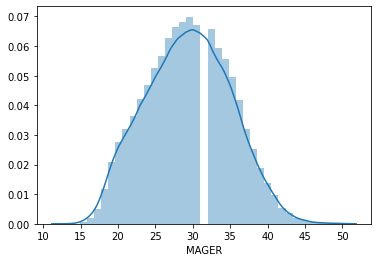

In [32]:
sns.distplot(df['MAGER'], bins = 39)

In [33]:
df.shape

(85804, 62)

In [34]:
df['NO_INFEC'].value_counts()

1    83908
0     1764
9      132
Name: NO_INFEC, dtype: int64

In [35]:
df['MRAVE6'].value_counts()

1    65374
2    11109
4     6270
6     2078
3      702
5      271
Name: MRAVE6, dtype: int64

In [36]:
df['PRIORTERM'].value_counts()

0     62226
1     15325
2      5155
3      1764
4       641
5       236
99      192
6       122
7        58
8        34
10       22
9        16
11        3
12        2
14        2
16        2
20        1
13        1
15        1
18        1
Name: PRIORTERM, dtype: int64

In [37]:
df['FRACE6'].value_counts()


1    59287
2    12100
9     6184
4     5357
6     2016
3      608
5      252
Name: FRACE6, dtype: int64

In [38]:
df['SEX'].value_counts()

M    44017
F    41787
Name: SEX, dtype: int64

In [39]:
df['PAY'].value_counts()

2    45944
1    32371
3     3680
8     1587
5     1160
6      640
9      370
4       52
Name: PAY, dtype: int64

In [40]:
df['DMAR'].unique()

array(['1', '2', ' '], dtype=object)

In [41]:
df['LD_INDL'].unique()

array(['N', 'Y', 'U'], dtype=object)

In [42]:
df['RF_CESAR'].unique()

array(['N', 'Y', 'U'], dtype=object)

In [43]:
df['NO_RISKS'].unique()

array([1, 0, 9], dtype=int64)

In [44]:
df['NO_MMORB'].unique()

array([1, 0, 9], dtype=int64)

In [45]:
df['MAGE_IMPFLG'].unique()

array([' ', '1'], dtype=object)

In [46]:
df['ILLB_R'].value_counts()

888    32554
999     2442
24      1212
22      1191
23      1185
       ...  
295        1
270        1
277        1
242        1
293        1
Name: ILLB_R, Length: 279, dtype: int64

In [47]:
df['ILP_R'].value_counts()

888    26327
999     9764
12      1267
21      1223
24      1206
       ...  
270        1
252        1
268        1
266        1
284        1
Name: ILP_R, Length: 273, dtype: int64

In [48]:
df['first_birth'] = np.where(df['ILLB_R'].eq(888), 1, 0)

In [421]:
df['plural_delivery'] = np.where(df['ILLB_R'].lt(4), 'Yes', 0)

In [50]:
df['first_pregnancy'] = np.where(df['ILP_R'].eq(888), 1, 0)

In [184]:
len(df[df['ILLB_R'].lt(4)])

1118

In [183]:
len(df[df['ILOP_R'].lt(4)])

8

In [182]:
len(df[df['ILP_R'].lt(4)])

1022

In [185]:
len(df[df['ILLB_R'].eq(888)])

32554

In [186]:
len(df[df['ILOP_R'].eq(888)])

62226

In [187]:
len(df[df['ILP_R'].eq(888)])

26327

In [188]:
df['first_natal'] = np.where(df['ILOP_R'].eq(888),1, 0)

In [51]:
df['first_birth'].value_counts()

0    53250
1    32554
Name: first_birth, dtype: int64

In [52]:
df['plural_delivery'].value_counts()

0    84686
1     1118
Name: plural_delivery, dtype: int64

In [53]:
df['PRECARE'] = np.where(df['PRECARE'].eq(99), 0, df['PRECARE'])
df['PRECARE'].value_counts()

2     35357
3     26838
4      7206
1      5109
5      3562
0      2501
6      2041
7      1605
8      1154
9       419
10       12
Name: PRECARE, dtype: int64

In [54]:
df['PREVIS'] = np.where(df['PREVIS'].eq(99), 0, df['PREVIS'])

In [55]:
df['PRIORLIVE_cat'].value_counts()

Yes        53013
None       32698
Unknown       93
Name: PRIORLIVE_cat, dtype: int64

In [56]:
df['PWgt_R'].value_counts()

130    3563
140    3211
150    3180
135    2764
120    2682
       ... 
349       1
78        1
369       1
373       1
367       1
Name: PWgt_R, Length: 298, dtype: int64

In [57]:
df['WTGAIN'].value_counts()

30    4229
20    3127
25    2987
35    2784
40    2612
32    2381
28    2340
33    2326
0     2307
27    2284
31    2221
23    2211
24    2195
22    2182
26    2172
29    2102
34    2099
36    1908
21    1822
37    1717
15    1706
38    1693
18    1580
19    1489
39    1484
45    1473
17    1419
16    1334
42    1312
41    1292
10    1235
14    1172
43    1157
50    1116
44    1097
13    1076
12    1036
46     921
11     906
47     809
48     794
49     672
8      669
9      665
55     589
6      567
5      561
7      544
52     523
51     512
53     454
4      449
54     439
60     428
2      383
3      382
56     339
1      329
57     310
58     307
59     225
65     224
62     218
61     181
70     173
63     147
64     144
98     125
66     112
67     110
68     103
75      81
69      80
71      62
72      60
80      59
73      58
76      42
74      42
78      37
77      34
83      26
81      25
85      25
82      21
79      21
90      20
88      18
86      16
95      15
84      14

In [83]:
df['MAGER^2'] = df['MAGER'] ** 2

In [189]:
df['35AGE_older'] = np.where(df['MAGER'].gt(34), 1, 0)

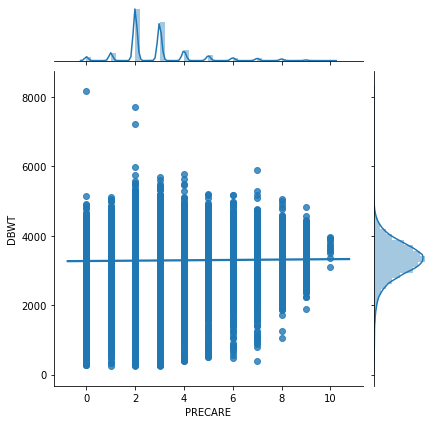

In [392]:
sns.jointplot(x='PRECARE', y='DBWT', data=df,kind='reg')

In [422]:
X = df[['ATTEND','BFACIL', 'BMI','smoked', 'DOB_MM', 'DMAR','FAGECOMB','FHISPX','FEDUC', 'FRACE6', 'first_birth', 'plural_delivery', 'first_pregnancy', 'plural_delivery', 'first_natal',
        'IP_GON', 'LD_INDL', 'MAGER', '35AGE_older','MAR_IMP', 'MBSTATE_REC', 'MEDUC', 'MHISPX', 'MRAVE6', 'MTRAN',
        'NO_INFEC','NO_MMORB','NO_RISKS','PAY', 'PAY_REC','PRECARE','PREVIS', 'PRIORDEAD_cat', 'PRIORLIVE_cat', 'PRIORTERM_cat', 'PWgt_R', 'BMI_log','M_Ht_In',
        'RDMETH_REC', 'RESTATUS', 'RF_CESAR', 'SEX', 'WTGAIN'
]]
_X = pd.get_dummies(X, columns=['ATTEND', 'BFACIL','smoked', 'DOB_MM','DMAR','FHISPX','FEDUC','FRACE6', 'plural_delivery',
                                'IP_GON','LD_INDL', '35AGE_older','MAR_IMP', 'MBSTATE_REC', 'MEDUC', 'MHISPX', 'MRAVE6', 'MTRAN',
                                'NO_INFEC','NO_MMORB','NO_RISKS', 'PAY', 'PAY_REC','PRIORDEAD_cat', 'PRIORLIVE_cat','PRIORTERM_cat',
                                'RDMETH_REC', 'RESTATUS', 'RF_CESAR', 'SEX'])
y = df['DBWT']

In [222]:
# _X['DBWT'] = y

In [223]:
from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy='median')
dummy_regr.fit(_X,y)


DummyRegressor(constant=None, quantile=None, strategy='median')

In [224]:
_dummy_y = dummy_regr.predict(X)

In [225]:
np.sqrt(metrics.mean_squared_error(y, _dummy_y))

579.0395785602474

In [226]:
df['M_Ht_In'].value_counts()

64    12832
63    11210
62    10909
65    10249
66     9432
67     7645
61     6139
60     4604
68     4235
69     2783
59     1902
70     1389
71      726
58      454
57      394
72      361
56      157
73       88
74       69
55       61
54       38
78       21
53       21
48       16
75       14
50       11
49       10
52       10
76        9
77        8
51        6
46        1
Name: M_Ht_In, dtype: int64

In [227]:
df['smoked'].value_counts()

None       79566
Daily       5986
Unknown      252
Name: smoked, dtype: int64

In [371]:
list(_X.columns)

['BMI',
 'FAGECOMB',
 'first_birth',
 'first_pregnancy',
 'first_natal',
 'MAGER',
 'PRECARE',
 'PREVIS',
 'PWgt_R',
 'BMI_log',
 'M_Ht_In',
 'WTGAIN',
 'ATTEND_1',
 'ATTEND_2',
 'ATTEND_3',
 'ATTEND_4',
 'ATTEND_5',
 'ATTEND_9',
 'BFACIL_1',
 'BFACIL_2',
 'BFACIL_3',
 'BFACIL_4',
 'BFACIL_5',
 'BFACIL_6',
 'BFACIL_7',
 'BFACIL_9',
 'smoked_Daily',
 'smoked_None',
 'smoked_Unknown',
 'DOB_MM_1',
 'DOB_MM_2',
 'DOB_MM_3',
 'DOB_MM_4',
 'DOB_MM_5',
 'DOB_MM_6',
 'DOB_MM_7',
 'DOB_MM_8',
 'DOB_MM_9',
 'DOB_MM_10',
 'DOB_MM_11',
 'DOB_MM_12',
 'DMAR_ ',
 'DMAR_1',
 'DMAR_2',
 'FHISPX_0',
 'FHISPX_1',
 'FHISPX_2',
 'FHISPX_3',
 'FHISPX_4',
 'FHISPX_5',
 'FHISPX_6',
 'FHISPX_9',
 'FEDUC_1',
 'FEDUC_2',
 'FEDUC_3',
 'FEDUC_4',
 'FEDUC_5',
 'FEDUC_6',
 'FEDUC_7',
 'FEDUC_8',
 'FEDUC_9',
 'FRACE6_1',
 'FRACE6_2',
 'FRACE6_3',
 'FRACE6_4',
 'FRACE6_5',
 'FRACE6_6',
 'FRACE6_9',
 'plural_delivery_0',
 'plural_delivery_1',
 'plural_delivery_0',
 'plural_delivery_1',
 'IP_GON_N',
 'IP_GON_U',
 'IP_

In [395]:
df['PRECARE'].value_counts()

2     35357
3     26838
4      7206
1      5109
5      3562
0      2501
6      2041
7      1605
8      1154
9       419
10       12
Name: PRECARE, dtype: int64

0     79566
20     1731
10     1631
5       604
3       286
99      252
2       250
1       213
4       205
6       188
40      183
15      159
7       127
8       105
30      100
12       47
9        27
60       22
25       19
98       18
80       14
11       11
18        6
16        6
21        5
50        5
24        5
13        3
14        3
35        2
36        2
19        2
23        1
88        1
90        1
27        1
22        1
42        1
48        1
Name: CIG_0, dtype: int64

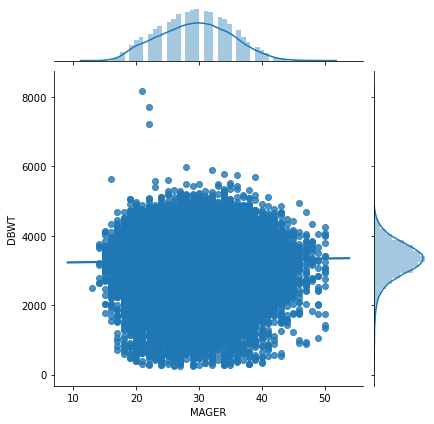

In [438]:
sns.jointplot(x='MAGER',y='DBWT', data=df,kind='reg')

In [435]:
df['DBWT_sqrt'] = np.sqrt(df['DBWT'])

In [446]:
df['MAGER_smoked'] = df['MAGER'] * df['smoked']

In [447]:
X = df[['ATTEND','BFACIL', 'BMI','smoked', 'DOB_MM', 'DMAR','FAGECOMB','FHISPX','FEDUC', 'FRACE6', 'first_birth', 'plural_delivery', 'first_pregnancy', 'plural_delivery', 'first_natal',
        'IP_GON', 'LD_INDL', 'MAGER', '35AGE_older','MAR_IMP', 'MBSTATE_REC', 'MEDUC', 'MHISPX', 'MRAVE6', 'MTRAN', 'MAGER_smoked',
        'NO_INFEC','NO_MMORB','NO_RISKS','PAY', 'PAY_REC','PRECARE','PREVIS', 'PRIORDEAD_cat', 'PRIORLIVE_cat', 'PRIORTERM_cat', 'PWgt_R', 'BMI_log','M_Ht_In',
        'RDMETH_REC', 'RESTATUS', 'RF_CESAR', 'SEX', 'WTGAIN'
]]
_X = pd.get_dummies(X, columns=['ATTEND', 'BFACIL','smoked', 'DOB_MM','DMAR','FHISPX','FEDUC','FRACE6', 'plural_delivery',
                                'IP_GON','LD_INDL', '35AGE_older','MAR_IMP', 'MBSTATE_REC', 'MEDUC', 'MHISPX', 'MRAVE6', 'MTRAN',
                                'NO_INFEC','NO_MMORB','NO_RISKS', 'PAY', 'PAY_REC','PRIORDEAD_cat', 'PRIORLIVE_cat','PRIORTERM_cat',
                                'RDMETH_REC', 'RESTATUS', 'RF_CESAR', 'SEX'])
y = df['DBWT']

In [426]:
df['plural_delivery'].value_counts()

0      84686
Yes     1118
Name: plural_delivery, dtype: int64

In [452]:
_X['DBWT'] = y
from statsmodels.formula.api import ols
formula = 'DBWT~BMI_log+WTGAIN+M_Ht_In+smoked_None+smoked_None+SEX_M+BFACIL_1+ATTEND_1+DMAR_1+FRACE6_1+FEDUC_3+FRACE6_1+first_birth+plural_delivery_0+first_natal+LD_INDL_N\
+MBSTATE_REC_1+MEDUC_6+MHISPX_0+MRAVE6_2+MRAVE6_1+MTRAN_Y+NO_RISKS_1+PAY_1+PRECARE+PREVIS+PRIORDEAD_cat_Yes+RDMETH_REC_3+RF_CESAR_Y+MAGER_smoked'
model = ols(formula=formula, data=_X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   DBWT   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     163.4
Date:                Wed, 29 Jul 2020   Prob (F-statistic):               0.00
Time:                        16:43:45   Log-Likelihood:            -6.5832e+05
No. Observations:               85804   AIC:                         1.317e+06
Df Residuals:                   85679   BIC:                         1.318e+06
Df Model:                         124                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================================================================================================================================================================================================================================================================================
                                                                                                                                                                                                                                                                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                                                                                                                                                                                                                                     -1712.9008    523.083     -3.275      0.001   -2738.139    -687.662
MAGER_smoked[T.DailyDailyDailyDailyDailyDailyDailyDailyDailyDailyDailyDailyDailyDailyDailyDaily]                                                                                                                                                                                                                                806.6924    551.795      1.462      0.144    -274.822    1888.207
MAGER_smoked[T.DailyDailyDailyDailyDailyDailyDailyDailyDailyDailyDailyDailyDailyDailyDailyDailyDaily]                                                                                                                                                                                                                           632.9632    528.054      1.199      0.231    -402.019    1667.945
MAGER_smoked[T.DailyDailyDailyDailyDailyDailyDailyDailyDailyDailyDailyDailyDailyDailyDailyDailyDailyDaily]                                                                                                                                                                                                                      480.5941    523.198      0.919      0.358    -544.870    1506.058
MAGER_smoked[T.DailyDailyDailyDailyDailyDailyDailyDailyDailyDailyDailyDailyDailyDailyDailyDailyDailyDailyDaily]                                                                                                                                                                                                                 514.1049    521.504      0.986      0.324    -508.039    1536

In [230]:
_X.columns


Index(['BMI', 'FAGECOMB', 'first_birth', 'plural_delivery', 'first_pregnancy',
       'plural_delivery', 'first_natal', 'MAGER', '35AGE_older', 'PRECARE',
       ...
       'RDMETH_REC_4', 'RDMETH_REC_5', 'RDMETH_REC_6', 'RDMETH_REC_9',
       'RESTATUS_2', 'RESTATUS_3', 'RESTATUS_4', 'RF_CESAR_U', 'RF_CESAR_Y',
       'SEX_M'],
      dtype='object', length=114)

In [231]:
# poly_2 = PolynomialFeatures(degree=2, include_bias=False)
# poly2_data = poly_2.fit_transform(_X)
# poly2_columns = poly_2.get_feature_names(_X.columns)
# df_poly2 = pd.DataFrame(poly2_data, columns = poly2_columns)
# df_poly2.shape

In [232]:
# _df = _X.corr().abs().stack().reset_index().sort_values(0, ascending=False)
# _df['pairs'] = list(zip(_df.level_0, _df.level_1))
# _df.set_index(['pairs'], inplace=True)
# _df.drop(columns =['level_1', 'level_0'], inplace=True)
# _df.columns = ['cc']
# _df.drop_duplicates(inplace=True)
# _to_remove = _df[(_df.cc>.75) & (_df.cc<1)]
# _to_remove

In [403]:
_X.shape

(85804, 158)

In [404]:
X_train, X_test, y_train, y_test = train_test_split(_X, y, random_state = 42, test_size= 0.2)


In [405]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(data=X_train, columns = _X.columns)
X_test = scaler.transform(X_test)
X_test= pd.DataFrame(data=X_test, columns = _X.columns)

In [406]:
# _X.corr()

In [407]:
lasso_cv = LassoCV(cv=5, random_state=42, verbose=1)
lasso_cv.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
.............................................................................................C:\Users\albert\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6035303.332960129, tolerance: 1836747.018742115
  tol, rng, random, positive)
.C:\Users\albert\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14055935.559274673, tolerance: 1836747.018742115
  tol, rng, random, positive)
.C:\Users\albert\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:472: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23269288.495998383, tolerance: 1836747.0187421

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=42, selection='cyclic',
        tol=0.0001, verbose=1)

In [408]:
y_train_pred = lasso_cv.predict(X_train)
y_test_pred = lasso_cv.predict(X_test)

In [409]:
np.sqrt(metrics.mean_squared_error(y_train,y_train_pred))

517.9198369010278

In [410]:
np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))

519.9098861161658

In [411]:
lasso_cv.score(X_train, y_train)

0.19745628352906086

In [241]:
y.describe()

count    85804.000000
mean      3285.694968
std        578.025858
min        245.000000
25%       2990.000000
50%       3320.000000
75%       3644.000000
max       8165.000000
Name: DBWT, dtype: float64

In [242]:
_coef_df = pd.DataFrame()
_coef_df['variables'] = _X.columns
_coef_df['coefficients'] = lasso_cv.coef_
_coef_df.sort_values(by='coefficients')

,variables,coefficients
3,plural_delivery,-109.830032
11,PWgt_R,-63.198925
76,MRAVE6_2,-53.819050
82,MTRAN_Y,-52.061017
50,FRACE6_4,-29.174233
103,RDMETH_REC_3,-26.037273
48,FRACE6_2,-23.931412
0,BMI,-19.731219
108,RESTATUS_2,-15.594600
41,FEDUC_3,-13.244054


In [243]:
_coef_df['coefficients'].describe()

count    114.000000
mean       3.460337
std       30.237020
min     -109.830032
25%       -4.660418
50%        0.000000
75%        2.953989
max      176.127075
Name: coefficients, dtype: float64

In [244]:
# _coef_df.sort_values(by='coefficients').to_csv('_coef_df2.csv', index=False,header=True)

In [245]:
X

,ATTEND,BFACIL,BMI,smoked,DOB_MM,FAGECOMB,FEDUC,FRACE6,first_birth,plural_delivery,first_pregnancy,plural_delivery,first_natal,IP_GON,LD_INDL,MAGER,35AGE_older,MAR_IMP,MBSTATE_REC,MEDUC,MHISPX,MRAVE6,MTRAN,NO_INFEC,NO_MMORB,NO_RISKS,PAY,PRECARE,PREVIS,PRIORDEAD_cat,PRIORLIVE_cat,PRIORTERM_cat,PWgt_R,BMI_log,M_Ht_In,RDMETH_REC,RESTATUS,RF_CESAR,SEX,WTGAIN
2745564,1,1,25.0,None,7,36,5,1,0,0,0,0,1,N,N,34,0,,1,6,0,1,N,1,1,1,2,2,12,None,Yes,None,155,3.218876,66,1,2,N,F,25
3083465,1,1,37.4,None,4,25,4,1,1,0,0,0,0,N,N,25,0,,1,3,0,1,N,1,1,1,2,3,13,None,None,Yes,218,3.621671,64,1,1,N,F,9
64636,1,1,28.2,None,12,33,6,1,0,0,0,0,0,N,N,30,0,,1,4,0,1,N,1,1,0,1,1,11,None,Yes,Yes,154,3.339322,62,4,1,Y,F,11
1898366,1,1,21.0,None,4,43,3,1,0,0,0,0,1,N,Y,37,1,,1,7,0,1,N,1,1,0,2,2,10,None,Yes,None,115,3.044522,62,1,2,N,F,32
1837169,1,1,33.1,None,4,52,3,2,0,0,0,0,0,N,N,31,0,,1,3,0,2,N,1,1,1,1,3,14,None,Yes,Yes,193,3.499533,64,1,1,N,F,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418357,1,1,21.5,None,3,30,6,4,1,0,1,0,1,N,N,31,0,,2,6,0,4,N,1,1,1,5,2,14,None,None,None,114,3.068053,61,3,1,N,M,46
148545,2,1,28.1,None,8,29,2,1,1,0,0,0,0,N,N,23,0,,1,2,1,1,N,1,1,0,1,2,15,None,None,Yes,174,3.335770,66,1,1,N,M,21
3393158,1,1,19.5,None,9,33,4,4,0,0,0,0,1,N,N,28,0,,2,4,9,4,N,1,1,0,1,4,6,None,Yes,None,110,2.970414,63,1,1,N,M,26
3150640,1,1,23.4,None,6,18,1,1,1,0,1,0,1,N,N,18,0,,1,3,1,1,N,1,1,1,1,0,0,None,None,None,120,3.152736,60,3,1,N,M,9


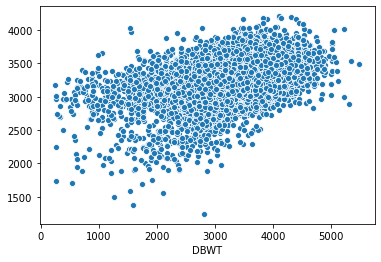

In [246]:
sns.scatterplot(y_test,y_test_pred)

In [75]:
# _coef_df.to_csv('_coef_df.csv',index=False, header=True)

In [76]:
df.shape

(85804, 64)

In [77]:
df['FAGECOMB'].value_counts()

32    5216
31    5165
30    5105
33    5047
34    4764
28    4747
29    4711
35    4521
27    4325
36    4024
26    3753
37    3479
25    3322
38    2969
24    2892
23    2426
39    2391
22    2106
40    1983
21    1698
41    1682
20    1266
42    1263
43    1056
19     841
44     764
45     684
46     569
18     487
47     472
48     383
49     269
50     231
17     203
51     166
52     133
53     129
54      94
16      79
56      77
55      77
58      47
57      41
59      27
60      27
15      22
61      13
63      12
64       9
65       8
62       7
67       5
73       3
66       3
71       2
68       2
88       1
98       1
14       1
13       1
76       1
74       1
70       1
Name: FAGECOMB, dtype: int64

In [78]:
df['MRAVE6'].value_counts()

1    65374
2    11109
4     6270
6     2078
3      702
5      271
Name: MRAVE6, dtype: int64

In [79]:
X

,ATTEND,BFACIL,BMI,smoked,DOB_MM,FAGECOMB,FEDUC,FRACE6,first_birth,plural_delivery,first_pregnancy,plural_delivery,IP_GON,LD_INDL,MAGER,MAR_IMP,MBSTATE_REC,MEDUC,MHISPX,MRAVE6,MTRAN,NO_INFEC,NO_MMORB,NO_RISKS,PAY,PRECARE,PREVIS,PRIORDEAD_cat,PRIORLIVE_cat,PRIORTERM_cat,PWgt_R,RDMETH_REC,RESTATUS,RF_CESAR,SEX,WTGAIN
2745564,1,1,25.0,None,7,36,5,1,0,0,0,0,N,N,34,,1,6,0,1,N,1,1,1,2,2,12,None,Yes,None,155,1,2,N,F,25
3083465,1,1,37.4,None,4,25,4,1,1,0,0,0,N,N,25,,1,3,0,1,N,1,1,1,2,3,13,None,None,Yes,218,1,1,N,F,9
64636,1,1,28.2,None,12,33,6,1,0,0,0,0,N,N,30,,1,4,0,1,N,1,1,0,1,1,11,None,Yes,Yes,154,4,1,Y,F,11
1898366,1,1,21.0,None,4,43,3,1,0,0,0,0,N,Y,37,,1,7,0,1,N,1,1,0,2,2,10,None,Yes,None,115,1,2,N,F,32
1837169,1,1,33.1,None,4,52,3,2,0,0,0,0,N,N,31,,1,3,0,2,N,1,1,1,1,3,14,None,Yes,Yes,193,1,1,N,F,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1418357,1,1,21.5,None,3,30,6,4,1,0,1,0,N,N,31,,2,6,0,4,N,1,1,1,5,2,14,None,None,None,114,3,1,N,M,46
148545,2,1,28.1,None,8,29,2,1,1,0,0,0,N,N,23,,1,2,1,1,N,1,1,0,1,2,15,None,None,Yes,174,1,1,N,M,21
3393158,1,1,19.5,None,9,33,4,4,0,0,0,0,N,N,28,,2,4,9,4,N,1,1,0,1,4,6,None,Yes,None,110,1,1,N,M,26
3150640,1,1,23.4,None,6,18,1,1,1,0,1,0,N,N,18,,1,3,1,1,N,1,1,1,1,0,0,None,None,None,120,3,1,N,M,9


In [80]:
df['NO_INFEC'].value_counts()

1    83908
0     1764
9      132
Name: NO_INFEC, dtype: int64

In [81]:
df.shape

(85804, 64)

In [82]:
df['CIG_0'].value_counts()

0     79566
20     1731
10     1631
5       604
3       286
99      252
2       250
1       213
4       205
6       188
40      183
15      159
7       127
8       105
30      100
12       47
9        27
60       22
25       19
98       18
80       14
11       11
18        6
16        6
21        5
50        5
24        5
13        3
14        3
35        2
36        2
19        2
23        1
88        1
90        1
27        1
22        1
42        1
48        1
Name: CIG_0, dtype: int64